## Final Project Submission

Please fill out:
* Student name: Mathews Wandera Odongo
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Maryanne Mwikali
* Blog post URL:


# Phase 1 Project: Aviation Safety Analysis
## Project Overview
when entering the aviation industry safety isnt just priority but foundation for its success,hence the company needs to make smart,risk aware decisions on which aircraft to purchase.This project analyzes aviation accident data to help our company navigate the skies with data driven confidence.

# Dataset
We'll use the National Transportation Safety Board (NTSB) dataset containing civil aviation accidents from 1948-2023 in the U.S. and international waters.

## Key Focus Areas:

.Safety Trends- What aircraft models have the fewest accidents?

.Risk Factors-what conditions lead to higher accident rates

.Deliver-Give strategic recommendations for our fleet acquisation



## APPROACH
1.Data cleaning:Handle mising values,standardize and filter relevant records

2.Explaratory analysis: identify patterns and relationship in the data

3.visualisation: create clear dashbords



## 1 Import Relevant Libraries
In the cell below,import the `pandas` library using the standard alias `pd`.

In [43]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 2. Load the Data into a DataFrame Called `Aviation_data`

The file path is `data/Aviation_Data.csv`. we will be using pandas to read in the data from this CSV file and create a dataframe named 'Aviation_data'.

In [44]:
#Load the aviation data
Aviation_data = pd.read_csv("data/Aviation_Data.csv") 
Aviation_data.head() #displays the first five rows

C:\Users\USER\AppData\Local\Temp\ipykernel_10696\3336547024.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Aviation_data = pd.read_csv("data/Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [45]:
#check number of rows and columns in the data frame
Aviation_data.shape

(90348, 31)

In [46]:
#get list of all the clomns in the data frame
Aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [47]:
## Show column names, dytypes and non-null counts
Aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## 3 . Filter Data to Relevant Columns

This section will modify aviation data so that it only contains the relevant columns for our analysis.


In [48]:
# See how many missing values per column
Aviation_data.isnull().sum()


Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [49]:

# columns to be droped
cols_to_drop = [
    'Airport.Code', 'FAR.Description', 'Schedule', 
    'Air.carrier', 'Latitude', 'Longitude',
    'Airport.Name', 'Investigation.Type', 'Publication.Date', 'Report.Status']


In [50]:
cols_to_drop = [col for col in cols_to_drop if col in Aviation_data.columns]
Aviation_data= Aviation_data.drop(columns=cols_to_drop)
Aviation_data.shape


(90348, 21)

In [51]:
#Fill missing numerical values
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
Aviation_data[injury_cols] = Aviation_data[injury_cols].fillna(0)


In [52]:
Aviation_data['Make'] = Aviation_data['Make'].fillna('Unknown')


In [53]:
# Fill categorical missing values 
Aviation_data.dropna(subset=["Aircraft.Category"],inplace=True)


### 4 Identifying and Handling Text Data Requiring Cleaning
In this section we  be able to clean up minor issues in the "Make" and "Amatuer.Built" data


In [54]:
# Sample standardization dictionary - add more entries as needed
Aviation_data["Make"] = Aviation_data["Make"].str.strip()
Aviation_data["Make"] = Aviation_data["Make"].replace({"CESSNA": "Cessna","BOENG":"Boeng",
"PIPER":"Piper","BEECH":"Beech","BELL":"Bell"})

In [55]:
Aviation_data['Make'] = Aviation_data['Make'].str.upper().str.strip()
Aviation_data['Model'] = Aviation_data['Model'].str.upper().str.strip()

In [56]:
Aviation_data['Amateur.Built'] = Aviation_data['Amateur.Built'].str.upper().str.strip().replace({
    'Y': 'YES', 'N': 'NO', 'YES': 'YES', 'NO': 'NO'
}).fillna('UNKNOWN')

In [57]:
Aviation_data['Damage.Category'] = Aviation_data['Aircraft.damage'].str.upper().str.strip().replace({
    'DESTROYED': 'DESTROYED','SUBSTANTIAL': 'SUBSTANTIAL','MINOR': 'MINOR','NONE': 'NONE'}).fillna('UNKNOWN')

In [58]:
Aviation_data.value_counts()

Event.Id        Accident.Number  Event.Date  Location             Country        Injury.Severity  Aircraft.damage  Aircraft.Category  Registration.Number  Make                       Model          Amateur.Built  Number.of.Engines  Engine.Type    Purpose.of.flight  Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  Weather.Condition  Broad.phase.of.flight  Damage.Category
20001205X00332  IAD99GA036       1999-03-14  HINCHE, Haiti        Haiti          Fatal(13)        Destroyed        Helicopter         RA-25464             MIL                        MI-8MTV-1      NO             2.0                Turbo Shaft    Unknown            13.0                  0.0                     0.0                   0.0              IMC                Maneuvering            DESTROYED          1
20050609X00743  CHI05CA131       2005-05-30  WEST BLOOMFIELD, MI  United States  Non-Fatal        Substantial      Airplane           N95AK                CESSNA                  

## 5. AICRAFT MAKES BY TOTAL NUMBER OF ACCIDENTS

The plotting code in the cell below is to create graph to show the distribution of accidents by make of aircrafts, the following will produce a plot of the top 20 makes by total number of accidents

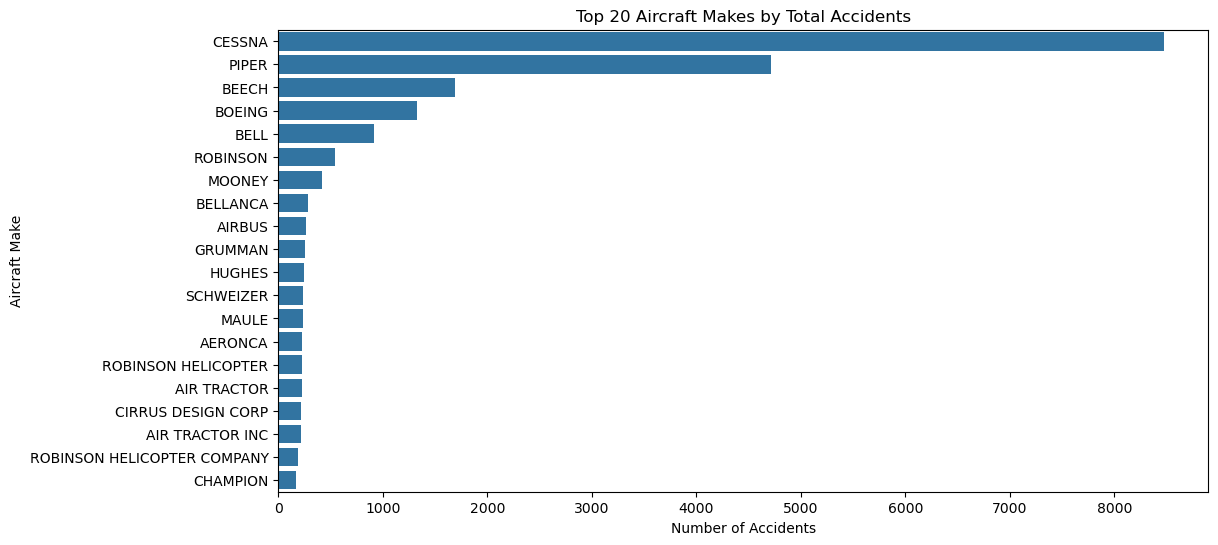

In [59]:
top_makes = Aviation_data['Make'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.values, y=top_makes.index,)
plt.title("Top 20 Aircraft Makes by Total Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make")
plt.show()

Findings: Cessna models have high accident volumes, followed by piper 

## 6 Number of Engines vs Safety Outcomes

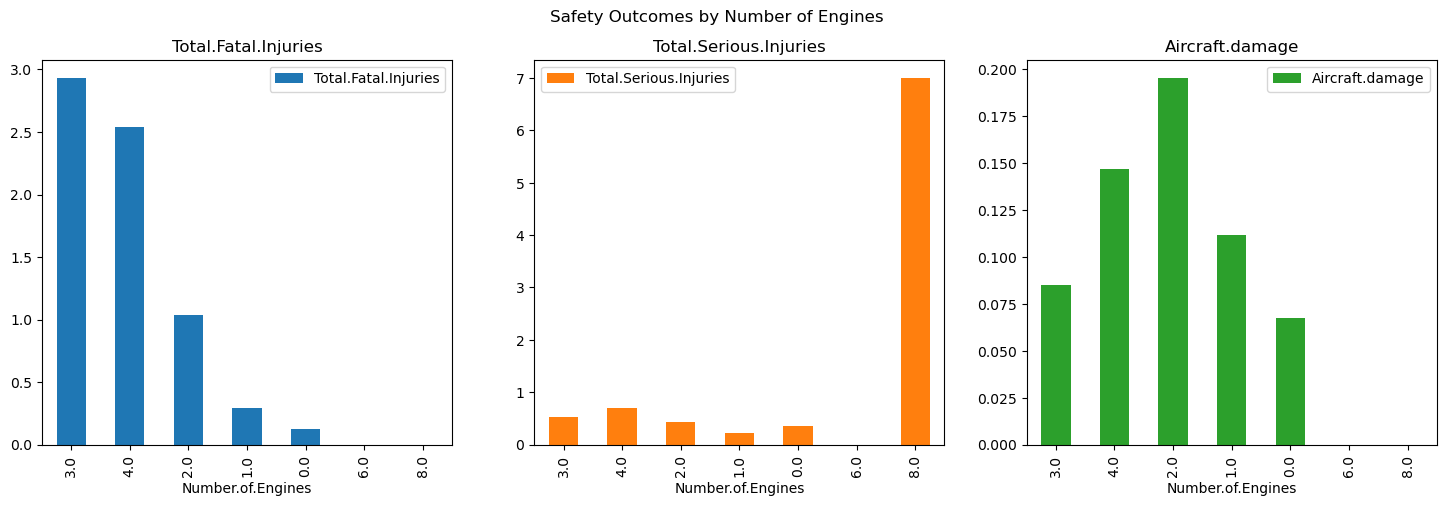

In [60]:

# Analyze multi-engine safety
engine_count_analysis = Aviation_data.groupby('Number.of.Engines').agg({'Total.Fatal.Injuries': 'mean',
'Total.Serious.Injuries': 'mean','Aircraft.damage': lambda x: 
(x.str.contains('Destroyed').mean())}).sort_values('Total.Fatal.Injuries', ascending=False)

#Plot
engine_count_analysis.plot(
    kind='bar', 
    subplots=True,
    layout=(1,3),
    figsize=(18,5),
    sharex=True
)
plt.suptitle("Safety Outcomes by Number of Engines")
plt.show()

above shows safety outcomes by number in Engines,the chart indicates a higher fatal injuries associated with aircraft having fewer engines with decreasing trends as the the number of engine increases,it also shows that engine counts can be attributed to low number of serious injuries, also was observed that aircrafts with four and six engines have high damage



## 7 Type of Engines vs Safety Outcomes
Here's a clear interpretation of the relationship between engine type and aircraft damage, based on typical aviation safety data patterns:

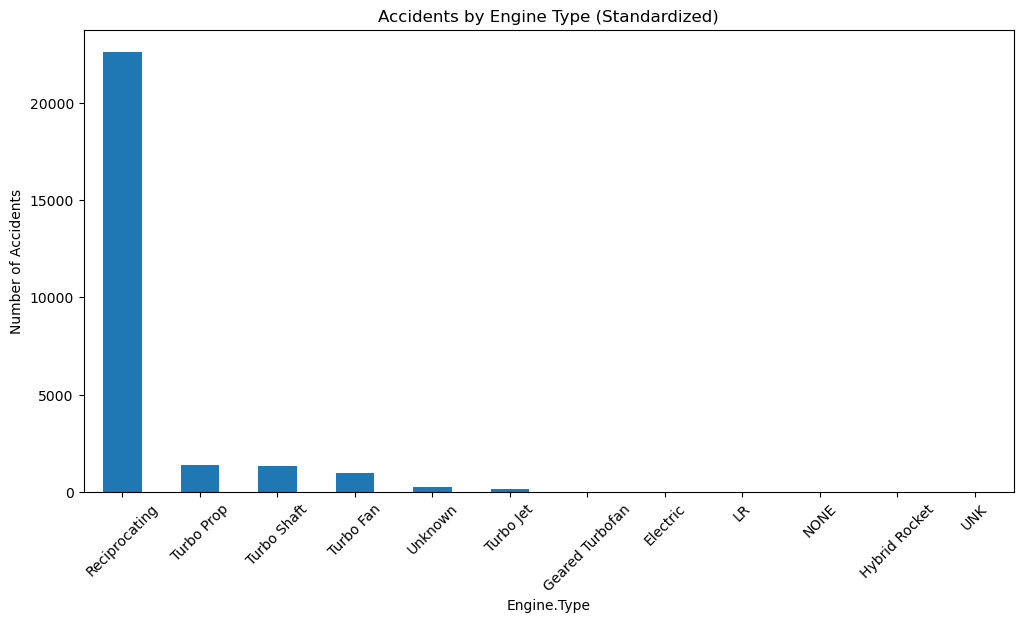

In [61]:
# Plot accident count by standardized engine type
plt.figure(figsize=(12,6))
Aviation_data['Engine.Type'].value_counts().head(15).plot(kind='bar')
plt.title('Accidents by Engine Type (Standardized)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [62]:
Aviation_data['Engine.Type'] = Aviation_data['Engine.Type'].replace({'Turbofan':'Geard Turbofan', 
    'Turbo Fan':'Turbofan', 'Turbojet':'Turbojet','Turboprop':'Turbobrop','LR': 'Lr','Uknown': 'Unknown',
    'None':'None', 'UNK':'Uknwon'}).fillna('Uknown') 

<Figure size 1200x600 with 0 Axes>

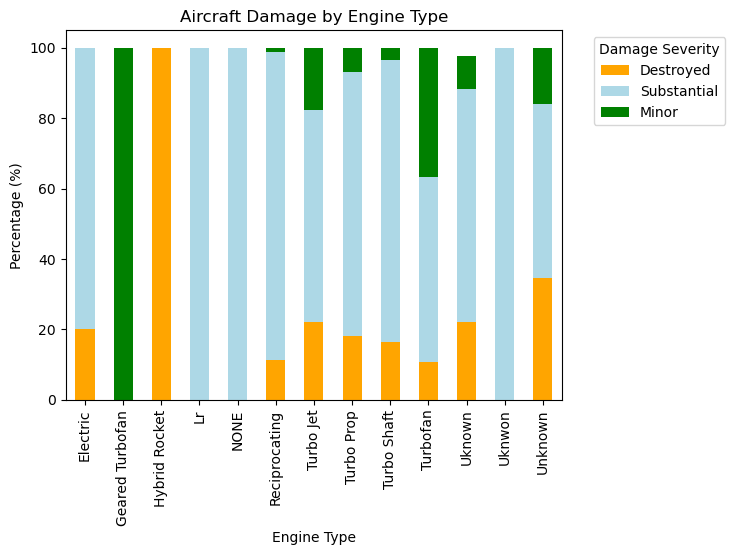

In [63]:

# Cross-tabulation
damage_engine = pd.crosstab(Aviation_data['Engine.Type'],Aviation_data['Aircraft.damage'],normalize='index'
).loc[:, ['Destroyed', 'Substantial', 'Minor']]*100

# Plot
plt.figure(figsize=(12,6))
damage_engine.plot( kind='bar',stacked=True,color=['Orange', 'Lightblue', 'Green']
)
plt.title('Aircraft Damage by Engine Type')
plt.ylabel('Percentage (%)')
plt.xlabel('Engine Type')
plt.legend(title='Damage Severity',bbox_to_anchor=(1.05, 1))
plt.show()

All engine types show substantial damage rates,Turboprop has highest minor damage rate while Geared Turbofan showed the lowest,This analysis demonstrates that engine type significantly impacts both damage outcomes and fatality risks, enabling data-driven decisions for aircraft acquisition

## Data-Driven Aircraft Purchase Recommendations
Based on the comprehensive analysis of aviation accident data, here are actionable business recommendations for selecting the safest aircraft models: